# Web Scraping with Pandas

We will learn to scrape data from a website using Pandas. We will use the `read_html` function of Pandas to scrape data from a website. 

We will do a little bit of preprocessing to clean the data and then we will save the data to a CSV file.

## Pandas

Pandas is a fast, powerful, flexible and easy to use open-source data analysis and data manipulation library built on top of the Python programming language. It is used in a wide range of fields including academic and commercial domains including finance, economics, statistics, analytics, etc.

Some call it "Excel on steroids" and it is a very popular library among data scientists.

### Pandas official page

https://pandas.pydata.org/

### Installing Pandas

You can install Pandas using the following command from command line:

```bash
pip install pandas
```

If you are using Jupyter notebook, you can run the following command in a cell:

```python
!pip install pandas
```

Pandas has many extra install options.
For example for html and excel support you can install it with:

```bash
pip install "pandas[html,excel]"
```

This will then install the required libraries for html and excel support.

In [5]:
# let's start with showing Python version
import sys # sys is a standard library
print("Python version: ", sys.version) # sys has a version attribute
# i could show what type of CPU I have
import platform # platform is a standard library
print("CPU: ", platform.processor()) # platform has a processor() function
# if you want exact type of CPU then there are external libraries like cpuinfo
# i could also show free memory
# import psutil # psutil is an external library # install with pip install psutil
# print("Free memory: ", psutil.virtual_memory().free) # psutil has a virtual_memory() function
# now that we have Pandas let's import it
import pandas as pd # pd is the standard alias for Pandas
# show version
print("Pandas version: ", pd.__version__) # serious libraries have a version attribute

Python version:  3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
CPU:  Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
Pandas version:  2.2.2


In [6]:
# now we need an url
# let's use url for wikipedia page about list of countries by population
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"
# wikipedia does have an API you could download data from but we will use Pandas to scrape the table
# read_html function will return a list of DataFrames
tables = pd.read_html(url) # here we make a call to the internet
# how many tables?
print("Number of tables: ", len(tables)) # len() is a standard function

Number of tables:  2


In [7]:
# now let's display first table
first_table = tables[0] # first table is at index 0, first_table is just an alias, not a copy
# show first 10 rows
first_table.head(10) # head() is a method of DataFrame, we do not need print() function for last element of notebook cell

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,World,7975105156,8045311448,+0.88%,NaN,NaN
1,India,1417173173,1428627663,+0.81%,Asia,Southern Asia
2,China[a],1425887337,1425671352,−0.02%,Asia,Eastern Asia
3,United States,338289857,339996564,+0.50%,Americas,Northern America
4,Indonesia,275501339,277534123,+0.74%,Asia,South-eastern Asia
5,Pakistan,235824862,240485658,+1.98%,Asia,Southern Asia
6,Nigeria,218541212,223804632,+2.41%,Africa,Western Africa
7,Brazil,215313498,216422446,+0.52%,Americas,South America
8,Bangladesh,171186373,172954319,+1.03%,Asia,Southern Asia
9,Russia,144713314,144444359,−0.19%,Europe,Eastern Europe


In [8]:
# what is the shape of the table?
print("Shape of the table: ", first_table.shape) # shape is an attribute of DataFrame

Shape of the table:  (239, 6)


In [9]:
# let us save to csv and excel
first_table.to_csv("countries_population.csv", index=False) # index=False will not save row numbers
first_table.to_excel("countries_population.xlsx", index=False) # index=False will not save row numbers

In [10]:
# we could read back say csv
df = pd.read_csv("countries_population.csv") # read_csv() is a function of Pandas
# documentation for Pandas read_csv function is at 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# note how many default parameters there are
# CSV is a very unstable format, it is not a standard, it is a convention
# there are many options

# let's see if default worked
df.head(10)

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,World,7975105156,8045311448,+0.88%,NaN,NaN
1,India,1417173173,1428627663,+0.81%,Asia,Southern Asia
2,China[a],1425887337,1425671352,−0.02%,Asia,Eastern Asia
3,United States,338289857,339996564,+0.50%,Americas,Northern America
4,Indonesia,275501339,277534123,+0.74%,Asia,South-eastern Asia
5,Pakistan,235824862,240485658,+1.98%,Asia,Southern Asia
6,Nigeria,218541212,223804632,+2.41%,Africa,Western Africa
7,Brazil,215313498,216422446,+0.52%,Americas,South America
8,Bangladesh,171186373,172954319,+1.03%,Asia,Southern Asia
9,Russia,144713314,144444359,−0.19%,Europe,Eastern Europe


In [ ]:
# there are many formats supported by Pandas
# such as parquet, json, sql, html, clipboard, pickle, feather, msgpack, stata, sas, spss, matlab, netcdf, arff, wav, jpeg, png, gif, webp, tiff, bmp, dicom, fits, mp3, mp4, ogg, pdf, sql, gbq, bigquery, html, gbq, bigquery, sql


In [11]:
# The fundamental data structure in Pandas is a DataFrame
# so DataFrame is a like a table
# it has rows and columns
# we have seen head() method
# we have seen to_csv() method
# we have seen to_excel() method

# let's see some info about columns
df.info() # info() is a method of DataFrame
# here objects are like strings it is a generic type
# we can try to cast them to more specific types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Location                     239 non-null    object
 1   Population (1 July 2022)     239 non-null    int64 
 2   Population (1 July 2023)     239 non-null    int64 
 3   Change                       238 non-null    object
 4   UN Continental Region[1]     238 non-null    object
 5   UN Statistical Subregion[1]  238 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.3+ KB


In [12]:
# let's make a simple filter all countries that start with letter L
# l_countries = df[df["Location"].str.startswith("L")] # str is a property of Series
l_countries = df[df.Location.str.startswith("L")] # str is a property of Series
# we can use . notation for columns if column names are one word and do not conflict with DataFrame methods

# let's see how many countries start with letter L
print("Number of countries that start with L: ", l_countries.shape[0])

# print first 5
l_countries.head() # 5 is default for head and tail methods

Number of countries that start with L:  9


,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
103,Laos,7529475,7633779,+1.39%,Asia,South-eastern Asia
107,Libya,6812341,6888388,+1.12%,Africa,Northern Africa
120,Liberia,5302681,5418377,+2.18%,Africa,Western Africa
122,Lebanon,5489740,5353930,−2.47%,Asia,Western Asia
142,Lithuania,2750055,2718352,−1.15%,Europe,Northern Europe


In [14]:
# let's leave only those countries that have population under 5 million
l_countries = l_countries[l_countries["Population (1 July 2023)"] < 5_000_000] # 5_000_000 is a number with underscores
l_countries

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
142,Lithuania,2750055,2718352,−1.15%,Europe,Northern Europe
147,Lesotho,2305826,2330318,+1.06%,Africa,Southern Africa
151,Latvia,1850651,1830212,−1.10%,Europe,Northern Europe
169,Luxembourg,647599,654768,+1.11%,Europe,Western Europe
217,Liechtenstein,39327,39585,+0.66%,Europe,Western Europe


In [15]:
# let's make a column of change from 2022 to 2023
l_countries["Change"] = l_countries["Population (1 July 2023)"] - l_countries["Population (1 July 2022)"]
l_countries


,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
142,Lithuania,2750055,2718352,-31703,Europe,Northern Europe
147,Lesotho,2305826,2330318,24492,Africa,Southern Africa
151,Latvia,1850651,1830212,-20439,Europe,Northern Europe
169,Luxembourg,647599,654768,7169,Europe,Western Europe
217,Liechtenstein,39327,39585,258,Europe,Western Europe


In [18]:
# let's sort countries by Change
l_countries = l_countries.sort_values("Change", ascending=False) # ascending=False means descending
# most methods return a new DataFrame, they do not modify the original
# many methods have inplace parameter that will modify the original
l_countries

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
147,Lesotho,2305826,2330318,24492,Africa,Southern Africa
169,Luxembourg,647599,654768,7169,Europe,Western Europe
217,Liechtenstein,39327,39585,258,Europe,Western Europe
151,Latvia,1850651,1830212,-20439,Europe,Northern Europe
142,Lithuania,2750055,2718352,-31703,Europe,Northern Europe


<Axes: title={'center': 'Population of countries starting with L in 2023'}, xlabel='Location'>

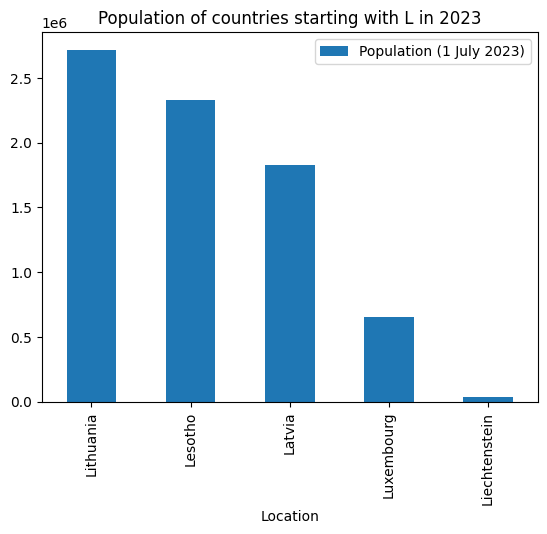

In [16]:
# finally we can plot Population on 2023
l_countries.plot(x="Location", 
                 y="Population (1 July 2023)", 
                 kind="bar", 
                 title="Population of countries starting with L in 2023")
# by default plot() method will use Matplotlib
# there is also way to supply alternative plotting libraries like Plotly - my personal favorite 
# https://plotly.com/python/pandas-backend/


In [ ]:
# so Pandas can:

# read html tables from url or file
# read many other formats
# save to many other formats
# filter data
# sort data
# add columns
# plot data
# there is also ability to pivot data, merge data, group data, aggregate data, etc.


# there is an upcoming library Polars that is supposed to be faster than Pandas - but similar in functionality